# Insertion Sort vs Merge Sort vs Deterministic Quick Sort(Non decreasing Inputs)

Importing required libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import timeit
import math
import sys

Setting the recursive limits

In [2]:
sys.setrecursionlimit(20000)

Insertion Sort function

In [3]:
def insertion(A):#insertion sort function
    start = timeit.default_timer()

    for i in range(1, len(A)):
        val=A[i]
        j=i-1
        while (j>=0) and (A[j]>val):
            A[j+1] = A[j]
            j=j-1
        S[j+1]=val
    stop = timeit.default_timer()
    return stop-start

Merge Sort function

In [4]:
def mergesort(A,p,r):
    start = timeit.default_timer()
    if p<r:
        q=math.floor((p+r)/2)
        mergesort(A,p,q)
        mergesort(A,q+1,r)
        Merge(A,p,q,r)
    stop = timeit.default_timer()
    return stop-start

In [5]:
def Merge(A,p,q,r):
    n1=q-p
    n2=r-q

    L=[A[p+i] for i in range(n1+1)]
    R=[A[q+i] for i in range(1,n2+1)]
    L.append(30000)
    R.append(30000)
    i=0
    j=0
    for k in range(p,r+1):
        if L[i]<R[j]:
            A[k]=L[i]
            i=i+1
        else:
            A[k]=R[j]
            j=j+1

Deterministic quicksort with last element as pivot

In [6]:
def dquicksort(A,p,r):
    start = timeit.default_timer()
    if p<r:
        q=partition(A,p,r)
        dquicksort(A,p,q-1)
        dquicksort(A,q+1,r)
    stop = timeit.default_timer()
    return stop-start

def partition(A,p,r):
    x=A[r]
    i=p-1
    for j in range(p,r):
        if (A[j]< x) or (A[j]==x):
            i=i+1
            f=A[i]
            A[i]=A[j]
            A[j]=f
    t=A[i+1]
    A[i+1]=A[r]
    A[r]=t
    return i+1

In [7]:
I=[]
M=[]
Q=[]
D=[]
for i in range(100,600,100):
    np.random.seed(0)#to get controlled random output
    Z=np.random.randint(low=1,high=i,size=i)#to get random integers in given interval;
    S=np.sort(Z, kind='heapsort')#sorting elements in ascending order
    D.append(i)
    I.append(insertion(S))
    M.append(mergesort(S,0,len(S)-1))
    Q.append(dquicksort(S,0,len(S)-1))

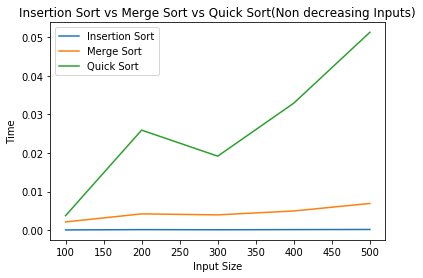

In [8]:
plt.plot(D,I)
plt.plot(D,M)
plt.plot(D,Q)
plt.legend(["Insertion Sort","Merge Sort","Quick Sort"])
plt.xlabel("Input Size")
plt.ylabel("Time")
plt.title("Insertion Sort vs Merge Sort vs Quick Sort(Non decreasing Inputs)")
plt.show()